In [36]:
import warnings
warnings.simplefilter("ignore")

In [37]:
import numpy as np
import pandas as pd

# Modelo simple de regresion

In [38]:
X =pd.read_csv("C:/Users/sergi/modalidad/Dataset/X.csv", encoding = 'utf-8')

In [39]:
X

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,DIA,NUM_COMUNA
0,-75.596093,6.256489,709812.0,1674223.0,7.0,2019.0,1112.0,6.0,9.0,11.0
1,-75.583161,6.250155,709813.0,1675562.0,5.0,2019.0,1103.0,6.0,21.0,11.0
2,-75.563856,6.250657,709814.0,1661788.0,3.0,2019.0,1019.0,2.0,27.0,10.0
3,-75.576757,6.268025,709815.0,1675911.0,2.0,2019.0,517.0,6.0,25.0,5.0
4,-75.571897,6.202827,709816.0,1673388.0,2.0,2019.0,1416.0,6.0,4.0,14.0
...,...,...,...,...,...,...,...,...,...,...
30857,-75.567508,6.264408,741806.0,1681376.0,2.0,2019.0,1004.0,8.0,6.0,10.0
30858,-75.561641,6.292987,741808.0,1676968.0,5.0,2019.0,210.0,7.0,5.0,2.0
30859,-75.554297,6.300337,741809.0,1683784.0,5.0,2019.0,205.0,8.0,23.0,2.0
30860,-75.602539,6.243216,741810.0,1679119.0,5.0,2019.0,1109.0,7.0,19.0,11.0


In [40]:
X.shape

(30862, 10)

In [41]:
y = X.drop(X.columns[[0,1,2,3,4,5,6,7,9]], axis='columns')
y.head(40)

,DIA
0,9.0
1,21.0
2,27.0
3,25.0
4,4.0
5,5.0
6,18.0
7,1.0
8,29.0
9,3.0


In [42]:
X = X.drop(X.columns[[8]], axis='columns')
print(X)

               X         Y  OBJECTID   RADICADO  DIA_NUMERO  PERIODO    CBML  \
0     -75.596093  6.256489  709812.0  1674223.0         7.0   2019.0  1112.0   
1     -75.583161  6.250155  709813.0  1675562.0         5.0   2019.0  1103.0   
2     -75.563856  6.250657  709814.0  1661788.0         3.0   2019.0  1019.0   
3     -75.576757  6.268025  709815.0  1675911.0         2.0   2019.0   517.0   
4     -75.571897  6.202827  709816.0  1673388.0         2.0   2019.0  1416.0   
...          ...       ...       ...        ...         ...      ...     ...   
30857 -75.567508  6.264408  741806.0  1681376.0         2.0   2019.0  1004.0   
30858 -75.561641  6.292987  741808.0  1676968.0         5.0   2019.0   210.0   
30859 -75.554297  6.300337  741809.0  1683784.0         5.0   2019.0   205.0   
30860 -75.602539  6.243216  741810.0  1679119.0         5.0   2019.0  1109.0   
30861 -75.561287  6.292312  741811.0  1680200.0         1.0   2019.0   210.0   

       MES  NUM_COMUNA  
0      6.0    

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.4)

In [44]:
print(len(X))
print(f'60 % de los datos es {len(X_train)}')
print(f'40 % de los datos es {len(X_test)}')

30862
60 % de los datos es 18517
40 % de los datos es 12345


In [45]:
X.head(1)

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,NUM_COMUNA
0,-75.596093,6.256489,709812.0,1674223.0,7.0,2019.0,1112.0,6.0,11.0


# Regresion Lasso

In [46]:
from sklearn.linear_model import Lasso

model = Lasso()

In [47]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [48]:
predicted = model.predict(X_test)

In [49]:
predicted

array([12.47366585, 18.14659409, 13.62907417, ..., 12.49342543,
       12.05207534, 14.21846537])

In [50]:
predicted.shape

(12345,)

# Distribucion geometrica

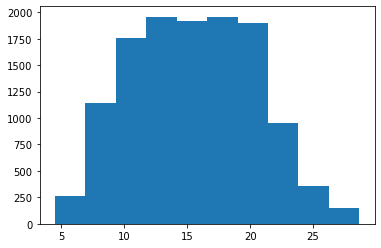

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted]);


Los accidentes entre los dias 12 y 23 hay mas concurrencia durante el año,
la predicción nos detalla que durante estos dias hay mas accidentalidad.

Debemos evaluar de forma más fina el comportamiento de nuestro modelo.

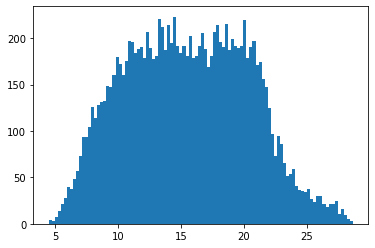

In [52]:
plt.hist([predicted], bins=100);

# Evaluando de forma más fina el comportamiento de nuestro modelo

El score r2 entre mas cercano al 1 es mejor, podemos entender su poder predictivo

In [53]:
model.score(X_test, y_test)

0.7153162521182214

Muy bueno el Score para un primer modelo

In [54]:
y_test.shape

(12345, 1)

In [56]:
predicted=predicted.reshape(12345,1)

In [57]:
residuals = y_test - predicted

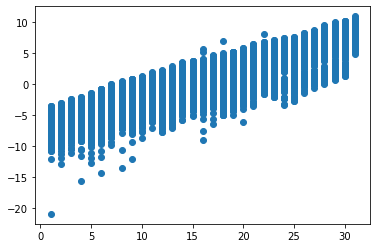

In [58]:
plt.scatter(y_test,residuals)

Errores porcentajes

In [59]:
ap_residuals = np.abs(residuals)/ y_test

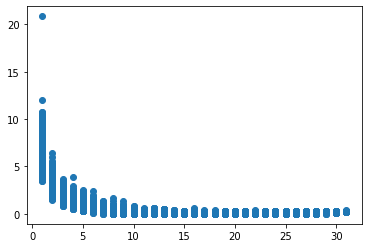

In [60]:
plt.scatter(y_test,ap_residuals)

para los primeros dias, tenemos unos errores bastantes altos

Aplicando una escala logaritmica

In [61]:
lap_residuals = np.log(ap_residuals)
lap_residuals

,DIA
4362,-0.952014
17177,-1.294130
9804,-3.630810
6201,-1.463843
30584,0.072134
...,...
27180,-1.384784
2644,0.416007
8272,-0.242358
25383,0.343884


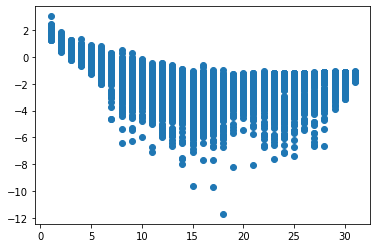

In [62]:
plt.scatter(y_test,lap_residuals)